In [1]:
#=======================================================================
# KLASIFIKASI DATA SUPPORT VECTOR MACHINE (SVM)
#=======================================================================

In [2]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Text preprocessing
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
from nltk.tokenize import word_tokenize

In [4]:
# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
import gensim.downloader as api

In [5]:
# Machine Learning - SUPPORT VECTOR MACHINE (SVM)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [7]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [8]:
# Download NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')


In [9]:
#=======================================================================
# BAGIAN 1: LOAD DATA
#=======================================================================

print("\n[1] Loading Data...")
df_positif = pd.read_csv('komentar_positif.csv')
df_negatif = pd.read_csv('komentar_negatif.csv')
df_netral = pd.read_csv('komentar_netral.csv')

# Tambahkan label
df_positif['label'] = 'positif'
df_negatif['label'] = 'negatif'
df_netral['label'] = 'netral'

# Gabungkan semua data
df = pd.concat([df_positif, df_negatif, df_netral], ignore_index=True)

print(f"  Total data: {len(df)}")
print(f"  - Positif: {len(df_positif)}")
print(f"  - Negatif: {len(df_negatif)}")
print(f"  - Netral: {len(df_netral)}")


[1] Loading Data...
  Total data: 350
  - Positif: 150
  - Negatif: 150
  - Netral: 50


In [10]:
#=======================================================================
# BAGIAN 2: TEXT PREPROCESSING (STEMMING & LEMMATIZATION)
#=======================================================================

print("\n[2] Text Preprocessing (Cleaning, Stemming, Stopword Removal)...")

# Initialize Sastrawi
factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

factory_stopword = StopWordRemoverFactory()
stopword_remover = factory_stopword.create_stop_word_remover()

def clean_text(text):
    """Cleaning text"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

def preprocess_text(text):
    """Full preprocessing: cleaning, stopword removal, stemming"""
    # Clean
    text = clean_text(text)
    # Remove stopwords
    text = stopword_remover.remove(text)
    # Stemming
    text = stemmer.stem(text)
    return text

# Apply preprocessing
df['comment_clean'] = df['comment'].apply(clean_text)
df['comment_processed'] = df['comment'].apply(preprocess_text)

print("  ✓ Preprocessing selesai!")
print(f"\n  Contoh preprocessing:")
print(f"  Original : {df['comment'].iloc[0][:80]}...")
print(f"  Cleaned  : {df['comment_clean'].iloc[0][:80]}...")
print(f"  Processed: {df['comment_processed'].iloc[0][:80]}...")


[2] Text Preprocessing (Cleaning, Stemming, Stopword Removal)...
  ✓ Preprocessing selesai!

  Contoh preprocessing:
  Original : anak pimpin nama purnawan efendi anak laki mukin umur anak normal umumnyapas kel...
  Cleaned  : anak pimpin nama purnawan efendi anak laki mukin umur anak normal umumnyapas kel...
  Processed: anak pimpin nama purnawan efendi anak laki mukin umur anak normal umumnyapas kel...


In [11]:
#=======================================================================
# BAGIAN 3: SPLIT DATA
#=======================================================================

print("\n[3] Splitting Data (80% Train, 20% Test)...")

X = df['comment_processed']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"  Training data: {len(X_train)}")
print(f"  Testing data: {len(X_test)}")


[3] Splitting Data (80% Train, 20% Test)...
  Training data: 280
  Testing data: 70


In [12]:
#=======================================================================
# BAGIAN 4: FEATURE EXTRACTION & CLASSIFICATION
#=======================================================================

results = []

print("\n" + "="*80)
print("FEATURE EXTRACTION & CLASSIFICATION - SUPPORT VECTOR MACHINE (SVM)")
print("="*80)


FEATURE EXTRACTION & CLASSIFICATION - SUPPORT VECTOR MACHINE (SVM)


In [13]:
#---------------------------------------------------------------------------
# 4.1 TF-IDF + SVM
#---------------------------------------------------------------------------

print("\n[4.1] TF-IDF + SVM")
print("-" * 50)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# SVM dengan kernel RBF (Radial Basis Function)
print("  Training SVM model...")
model_tfidf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42,
    decision_function_shape='ovr'  # One-vs-Rest for multiclass
)
model_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
prec_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')
rec_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')

print(f"  Accuracy : {acc_tfidf:.4f}")
print(f"  Precision: {prec_tfidf:.4f}")
print(f"  Recall   : {rec_tfidf:.4f}")
print(f"  F1-Score : {f1_tfidf:.4f}")

results.append({
    'Method': 'TF-IDF',
    'Accuracy': acc_tfidf,
    'Precision': prec_tfidf,
    'Recall': rec_tfidf,
    'F1-Score': f1_tfidf
})

print("\n  Classification Report:")
print(classification_report(y_test, y_pred_tfidf))



[4.1] TF-IDF + SVM
--------------------------------------------------
  Training SVM model...
  Accuracy : 0.6000
  Precision: 0.5212
  Recall   : 0.6000
  F1-Score : 0.5537

  Classification Report:
              precision    recall  f1-score   support

     negatif       0.56      0.77      0.65        30
      netral       0.00      0.00      0.00        10
     positif       0.66      0.63      0.64        30

    accuracy                           0.60        70
   macro avg       0.41      0.47      0.43        70
weighted avg       0.52      0.60      0.55        70



In [14]:
#---------------------------------------------------------------------------
# 4.2 BAG OF WORDS (BOW) + SVM
#---------------------------------------------------------------------------

print("\n[4.2] Bag of Words (BOW) + SVM")
print("-" * 50)

bow_vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

print("  Training SVM model...")
model_bow = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42,
    decision_function_shape='ovr'
)
model_bow.fit(X_train_bow, y_train)

y_pred_bow = model_bow.predict(X_test_bow)

acc_bow = accuracy_score(y_test, y_pred_bow)
prec_bow = precision_score(y_test, y_pred_bow, average='weighted')
rec_bow = recall_score(y_test, y_pred_bow, average='weighted')
f1_bow = f1_score(y_test, y_pred_bow, average='weighted')

print(f"  Accuracy : {acc_bow:.4f}")
print(f"  Precision: {prec_bow:.4f}")
print(f"  Recall   : {rec_bow:.4f}")
print(f"  F1-Score : {f1_bow:.4f}")

results.append({
    'Method': 'Bag of Words',
    'Accuracy': acc_bow,
    'Precision': prec_bow,
    'Recall': rec_bow,
    'F1-Score': f1_bow
})

print("\n  Classification Report:")
print(classification_report(y_test, y_pred_bow))


[4.2] Bag of Words (BOW) + SVM
--------------------------------------------------
  Training SVM model...
  Accuracy : 0.4571
  Precision: 0.4187
  Recall   : 0.4571
  F1-Score : 0.3858

  Classification Report:
              precision    recall  f1-score   support

     negatif       0.44      0.83      0.57        30
      netral       0.00      0.00      0.00        10
     positif       0.54      0.23      0.33        30

    accuracy                           0.46        70
   macro avg       0.33      0.36      0.30        70
weighted avg       0.42      0.46      0.39        70



In [15]:
#---------------------------------------------------------------------------
# 4.3 WORD2VEC + SVM
#---------------------------------------------------------------------------

print("\n[4.3] Word2Vec + SVM")
print("-" * 50)

# Tokenize untuk Word2Vec
X_train_tokens = [text.split() for text in X_train]
X_test_tokens = [text.split() for text in X_test]

# Train Word2Vec model
print("  Training Word2Vec model...")
w2v_model = Word2Vec(
    sentences=X_train_tokens,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    epochs=10
)

def document_vector(doc, model):
    """Convert document to average word vector"""
    doc = [word for word in doc if word in model.wv]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

# Convert to vectors
X_train_w2v = np.array([document_vector(doc, w2v_model) for doc in X_train_tokens])
X_test_w2v = np.array([document_vector(doc, w2v_model) for doc in X_test_tokens])

# SVM untuk continuous features
print("  Training SVM model...")
model_w2v = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42,
    decision_function_shape='ovr'
)
model_w2v.fit(X_train_w2v, y_train)

y_pred_w2v = model_w2v.predict(X_test_w2v)

acc_w2v = accuracy_score(y_test, y_pred_w2v)
prec_w2v = precision_score(y_test, y_pred_w2v, average='weighted')
rec_w2v = recall_score(y_test, y_pred_w2v, average='weighted')
f1_w2v = f1_score(y_test, y_pred_w2v, average='weighted')

print(f"  Accuracy : {acc_w2v:.4f}")
print(f"  Precision: {prec_w2v:.4f}")
print(f"  Recall   : {rec_w2v:.4f}")
print(f"  F1-Score : {f1_w2v:.4f}")

results.append({
    'Method': 'Word2Vec',
    'Accuracy': acc_w2v,
    'Precision': prec_w2v,
    'Recall': rec_w2v,
    'F1-Score': f1_w2v
})

print("\n  Classification Report:")
print(classification_report(y_test, y_pred_w2v))



[4.3] Word2Vec + SVM
--------------------------------------------------
  Training Word2Vec model...
  Training SVM model...
  Accuracy : 0.5714
  Precision: 0.5105
  Recall   : 0.5714
  F1-Score : 0.5278

  Classification Report:
              precision    recall  f1-score   support

     negatif       0.51      0.77      0.61        30
      netral       0.00      0.00      0.00        10
     positif       0.68      0.57      0.62        30

    accuracy                           0.57        70
   macro avg       0.40      0.44      0.41        70
weighted avg       0.51      0.57      0.53        70



In [16]:
#---------------------------------------------------------------------------
# 4.4 GLOVE (Pre-trained) + SVM
#---------------------------------------------------------------------------

print("\n[4.4] GloVe (Pre-trained) + SVM")
print("-" * 50)
print("  Loading pre-trained GloVe model (glove-wiki-gigaword-100)...")
print("  (This may take a while on first run...)")

try:
    # Load pre-trained GloVe
    glove_model = api.load("glove-wiki-gigaword-100")
    
    def document_vector_glove(doc, model):
        """Convert document to average GloVe vector"""
        vectors = []
        for word in doc:
            try:
                vectors.append(model[word])
            except KeyError:
                continue
        if len(vectors) == 0:
            return np.zeros(100)
        return np.mean(vectors, axis=0)
    
    # Convert to vectors
    X_train_glove = np.array([document_vector_glove(doc, glove_model) for doc in X_train_tokens])
    X_test_glove = np.array([document_vector_glove(doc, glove_model) for doc in X_test_tokens])
    
    # SVM
    print("  Training SVM model...")
    model_glove = SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42,
        decision_function_shape='ovr'
    )
    model_glove.fit(X_train_glove, y_train)
    
    y_pred_glove = model_glove.predict(X_test_glove)
    
    acc_glove = accuracy_score(y_test, y_pred_glove)
    prec_glove = precision_score(y_test, y_pred_glove, average='weighted')
    rec_glove = recall_score(y_test, y_pred_glove, average='weighted')
    f1_glove = f1_score(y_test, y_pred_glove, average='weighted')
    
    print(f"  Accuracy : {acc_glove:.4f}")
    print(f"  Precision: {prec_glove:.4f}")
    print(f"  Recall   : {rec_glove:.4f}")
    print(f"  F1-Score : {f1_glove:.4f}")
    
    results.append({
        'Method': 'GloVe',
        'Accuracy': acc_glove,
        'Precision': prec_glove,
        'Recall': rec_glove,
        'F1-Score': f1_glove
    })
    
    print("\n  Classification Report:")
    print(classification_report(y_test, y_pred_glove))
    
except Exception as e:
    print(f"  ⚠ Error loading GloVe: {e}")
    print("  Skipping GloVe evaluation...")


[4.4] GloVe (Pre-trained) + SVM
--------------------------------------------------
  Loading pre-trained GloVe model (glove-wiki-gigaword-100)...
  (This may take a while on first run...)
  Training SVM model...
  Accuracy : 0.5857
  Precision: 0.5047
  Recall   : 0.5857
  F1-Score : 0.5412

  Classification Report:
              precision    recall  f1-score   support

     negatif       0.55      0.70      0.62        30
      netral       0.00      0.00      0.00        10
     positif       0.62      0.67      0.65        30

    accuracy                           0.59        70
   macro avg       0.39      0.46      0.42        70
weighted avg       0.50      0.59      0.54        70



In [17]:
#=======================================================================
# BAGIAN 6: VISUALIZATION
#=======================================================================

print("\n[6] Creating Visualizations...")


[6] Creating Visualizations...


In [21]:
#=======================================================================
# BAGIAN 5: COMPARISON & VISUALIZATION
#=======================================================================

print("\n" + "="*80)
print("COMPARISON OF ALL METHODS")
print("="*80)

df_results = pd.DataFrame(results)
print("\n", df_results.to_string(index=False))

# Save results to CSV
df_results.to_csv('classification_results_svm.csv', index=False)
print("\n✓ Results saved to: classification_results_svm.csv")

# Find best method
best_method = df_results.loc[df_results['Accuracy'].idxmax()]
print(f"\n🏆 Best Method: {best_method['Method']}")
print(f"   Accuracy: {best_method['Accuracy']:.4f}")
print(f"   F1-Score: {best_method['F1-Score']:.4f}")


COMPARISON OF ALL METHODS

       Method  Accuracy  Precision   Recall  F1-Score
      TF-IDF  0.600000   0.521206 0.600000  0.553695
Bag of Words  0.457143   0.418739 0.457143  0.385840
    Word2Vec  0.571429   0.510476 0.571429  0.527792
       GloVe  0.585714   0.504699 0.585714  0.541204

✓ Results saved to: classification_results_svm.csv

🏆 Best Method: TF-IDF
   Accuracy: 0.6000
   F1-Score: 0.5537


In [22]:
#=======================================================================
# BAGIAN 6: VISUALIZATION
#=======================================================================

print("\n[6] Creating Visualizations...")


[6] Creating Visualizations...


  ✓ Saved: comparison_metrics_svm.png


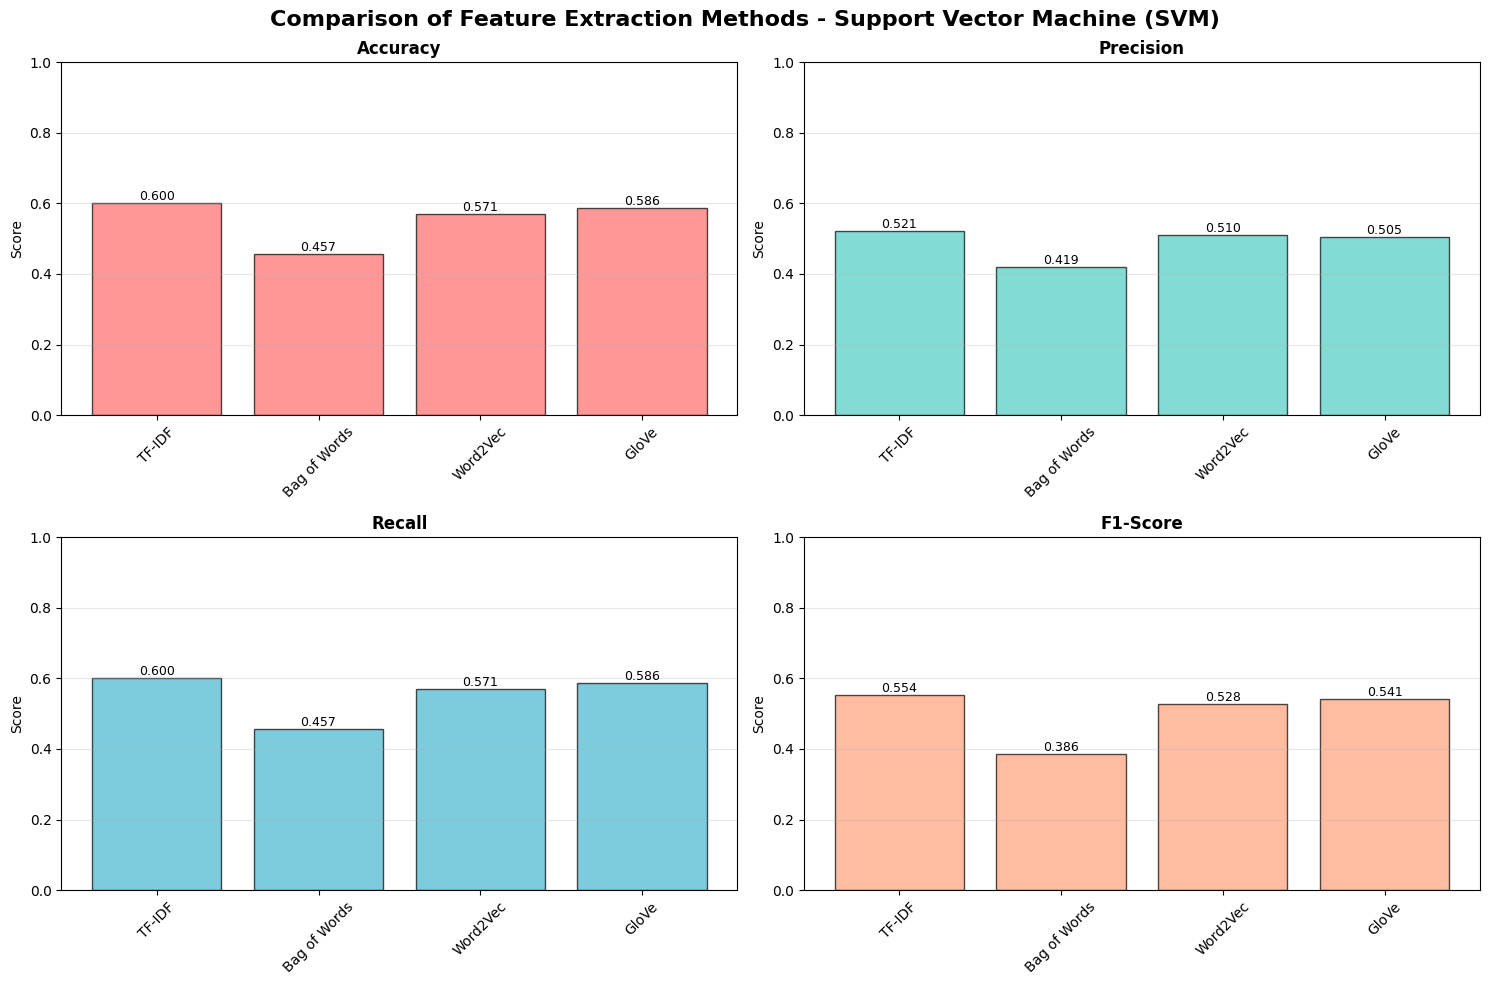

In [23]:
# 6.1 Comparison bar chart
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparison of Feature Extraction Methods - Support Vector Machine (SVM)', 
             fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, (ax, metric, color) in enumerate(zip(axes.flat, metrics, colors)):
    bars = ax.bar(df_results['Method'], df_results[metric], 
                  color=color, alpha=0.7, edgecolor='black')
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=10)
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('comparison_metrics_svm.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: comparison_metrics_svm.png")


  ✓ Saved: confusion_matrix_svm.png


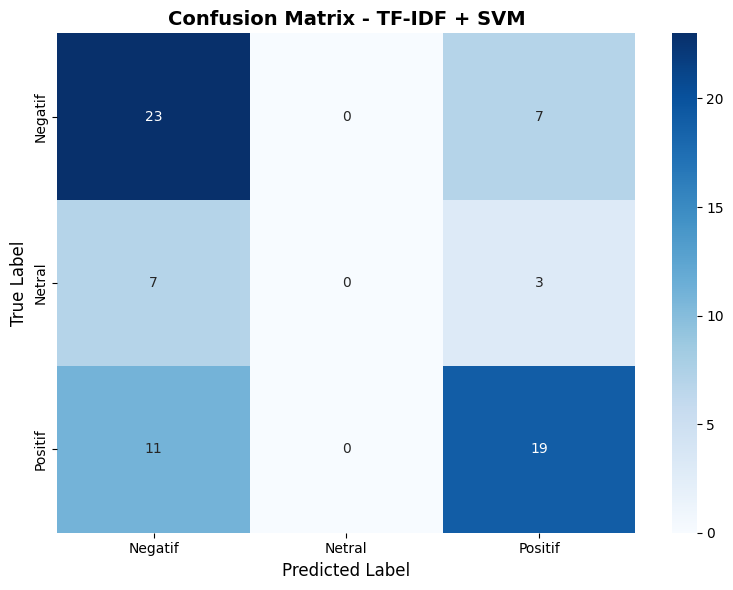

In [24]:
# 6.2 Confusion Matrix for best method (TF-IDF)
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'],
            ax=ax)
ax.set_title('Confusion Matrix - TF-IDF + SVM', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.savefig('confusion_matrix_svm.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: confusion_matrix_svm.png")

  ✓ Saved: radar_comparison_svm.png


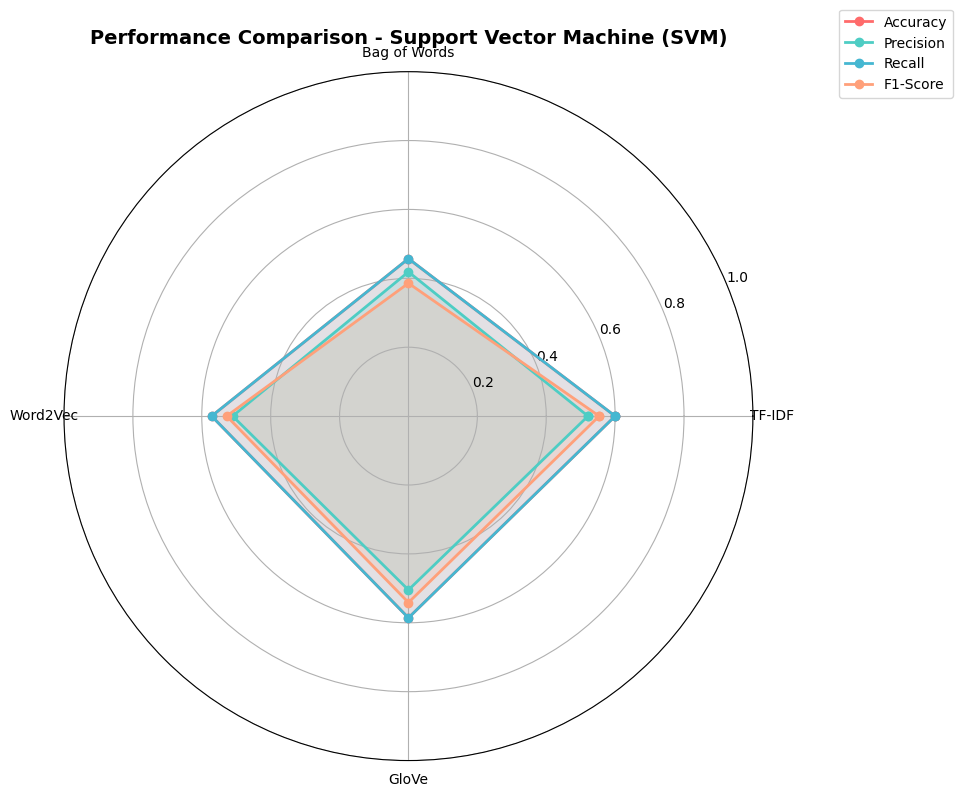

In [25]:
# 6.3 Overall comparison radar chart
categories = list(df_results['Method'])
N = len(categories)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_radar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for metric, color in zip(metrics_to_plot, colors_radar):
    values = df_results[metric].tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=metric, color=color)
    ax.fill(angles, values, alpha=0.15, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=10)
ax.set_ylim(0, 1)
ax.set_title('Performance Comparison - Support Vector Machine (SVM)', 
             size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.savefig('radar_comparison_svm.png', dpi=300, bbox_inches='tight')
print("  ✓ Saved: radar_comparison_svm.png")

In [26]:
#=======================================================================
# BAGIAN 7: SAVE PREDICTIONS
#=======================================================================

print("\n[7] Saving Predictions...")

# Create dataframe with predictions from all methods
df_predictions = pd.DataFrame({
    'comment_original': df.loc[X_test.index, 'comment'].values,
    'comment_processed': X_test.values,
    'true_label': y_test.values,
    'pred_tfidf': y_pred_tfidf,
    'pred_bow': y_pred_bow,
    'pred_word2vec': y_pred_w2v
})

# Add GloVe predictions if available
if 'y_pred_glove' in locals():
    df_predictions['pred_glove'] = y_pred_glove

df_predictions.to_csv('predictions_comparison_svm.csv', index=False)
print("  ✓ Saved: predictions_comparison_svm.csv")


[7] Saving Predictions...
  ✓ Saved: predictions_comparison_svm.csv


In [27]:
#=======================================================================
# FINAL SUMMARY
#=======================================================================

print("\n" + "="*80)
print("CLASSIFICATION COMPLETED!")
print("="*80)
print("\n🏆 Output Files:")
print("  1. classification_results_svm.csv - Performance metrics untuk semua metode")
print("  2. predictions_comparison_svm.csv - Prediksi dari semua metode")
print("  3. comparison_metrics_svm.png - Bar chart perbandingan metrik")
print("  4. confusion_matrix_svm.png - Confusion matrix TF-IDF")
print("  5. radar_comparison_svm.png - Radar chart perbandingan performa")

print("\n🏆 Summary:")
print(f"  ✓ Total data: {len(df)}")
print(f"  ✓ Training: {len(X_train)} | Testing: {len(X_test)}")
print(f"  ✓ Feature extraction methods tested: {len(results)}")
print(f"  ✓ Best method: {best_method['Method']} (Accuracy: {best_method['Accuracy']:.4f})")
print(f"  ✓ Classifier: Support Vector Machine (SVM)")

print("\n" + "="*80)


CLASSIFICATION COMPLETED!

🏆 Output Files:
  1. classification_results_svm.csv - Performance metrics untuk semua metode
  2. predictions_comparison_svm.csv - Prediksi dari semua metode
  3. comparison_metrics_svm.png - Bar chart perbandingan metrik
  4. confusion_matrix_svm.png - Confusion matrix TF-IDF
  5. radar_comparison_svm.png - Radar chart perbandingan performa

🏆 Summary:
  ✓ Total data: 350
  ✓ Training: 280 | Testing: 70
  ✓ Feature extraction methods tested: 4
  ✓ Best method: TF-IDF (Accuracy: 0.6000)
  ✓ Classifier: Support Vector Machine (SVM)

